In [ ]:
import pandas as pd
from pathlib import Path

path = Path.cwd() / "table.csv"
df = pd.read_csv(path).dropna()
df["word_count"] = df["word_count"].astype("uint64")

print(df[["title", "word_count", "date_published"]].sort_values(by="word_count", ascending=False).head(10))

                            title  word_count     date_published
810  Mini-Chapters – Patreon Poll       67710       July 5, 2025
816                       10.46 L       64392    August 30, 2025
839                     10.53 UEG       62720  December 21, 2025
829               10.47 S (Pt. 2)       62584   October 22, 2025
738                       10.19 E       57558      June 30, 2024
658                  9.41 (Pt. 3)       56111     April 30, 2023
778                    10.30 GGMG       55122  December 22, 2024
786                     10.34 MGF       55059  February 16, 2025
791                  10.36 – Pt.1       53550     March 16, 2025
674                        9.54 C       53385      July 16, 2023


In [28]:
print(f"COUNT: {df.shape[0]}")
print(f"SUM: {df["word_count"].sum():,.0f}")
print(f"MEAN: {df["word_count"].mean():,.0f}")
print(f"MAX: {df["word_count"].max():,.0f}")
print(f"PAGES: {df["word_count"].sum() / 275:,.0f}")

COUNT: 837
SUM: 16,199,086
MEAN: 19,354
MAX: 67,710
PAGES: 58,906


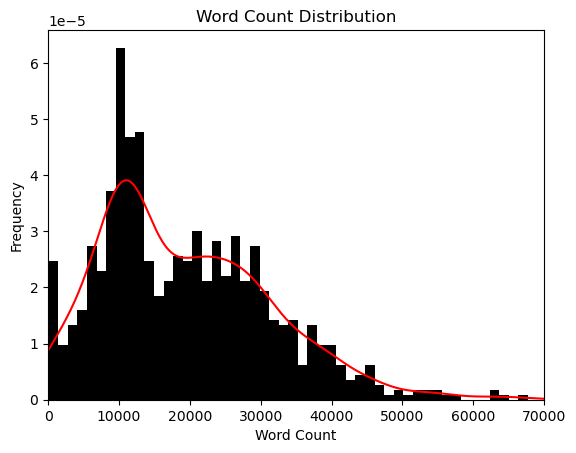

In [29]:
from matplotlib import pyplot as plt

ax = df["word_count"].plot.hist(bins=50, color="k", density=True)
df["word_count"].plot.density(color="r", ax=ax)
ax.set_xlim(left=0, right=70000)
ax.set_xlabel("Word Count")
ax.set_ylabel("Frequency")
ax.set_title("Word Count Distribution")
plt.show()

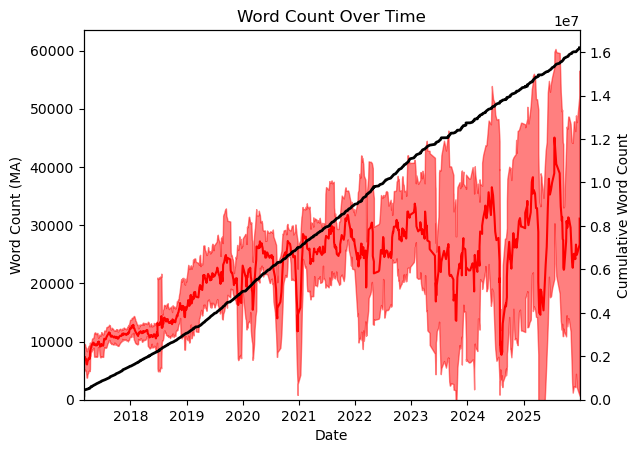

In [30]:
date = pd.to_datetime(df["date_published"])
cumulative = df["word_count"].cumsum()
rolling = df["word_count"].rolling(window=10, center=True, min_periods=0)

ax1 = plt.subplot()
ax1.plot(date, rolling.mean(), color="r")
ax1.fill_between(date,
                 rolling.mean() - rolling.std(),
                 rolling.mean() + rolling.std(),
                 color="r", alpha=0.5)
ax1.set_ylim(bottom=0)
ax1.set_xlim((date.iat[0], date.iat[-1]))
ax1.set_xlabel("Date")
ax1.set_ylabel("Word Count (MA)")
ax1.set_title("Word Count Over Time")

ax2 = ax1.twinx()
ax2.plot(date, cumulative, color="k", lw=2)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("Cumulative Word Count")
plt.show()